In [35]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

%matplotlib inline

### Helper Function

In [23]:
def plot_model_history(model_history):
    # summarize history for accuracy
    pyplot.plot(model_history.history['accuracy'])
    pyplot.plot(model_history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()

    # summarize history for loss
    pyplot.plot(model_history.history['loss'])
    pyplot.plot(model_history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()

In [29]:
#helper function
def show_image(img, label="", zoom=False):
    #labelname[y_train[0,0].astype(int)]
    if not zoom:
        #pyplot.figure(figsize=(4,3))
        pyplot.subplot(330 + 1 + i)
    else:
        pyplot.figure(figsize=(6,3))
        pyplot.subplot(1,2,1)
        pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    #pyplot.imshow(img, cmap=pyplot.cm.binary)
    pyplot.xlabel('{code} - {label}'.format(code=label, label=labelname[label]))
    pyplot.imshow(img, cmap=pyplot.cm.binary)

#helper function
def show_image_prediction(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])

  pyplot.imshow(img, cmap=pyplot.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'

  else:
    color = 'red'

  pyplot.xlabel("{} {:2.0f}% ({})".format(labelname[predicted_label],
                                100*np.max(predictions_array),
                                labelname[true_label[0]]),
                                color=color)

def show_value_prediction(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  thisplot = pyplot.bar(range(10), predictions_array, color="#777777")
  pyplot.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

## Prepare Dataset

In [8]:
# Load CIFAR-10 dataset
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

In [9]:
#Split training data into training and validation
from sklearn.model_selection import train_test_split

train_img,val_img,train_label,val_label=train_test_split(train_img,train_label,test_size=.3)

In [10]:
print('training data:', (train_img.shape,train_label.shape))
print('validation data:', (val_img.shape,val_label.shape))
print('test data:', (test_img.shape,test_label.shape))

training data: ((35000, 32, 32, 3), (35000, 1))
validation data: ((15000, 32, 32, 3), (15000, 1))
test data: ((10000, 32, 32, 3), (10000, 1))


In [12]:
# Change label to one-hot-encoding
num_classes = 10
train_label_one_hot = to_categorical(train_label, num_classes)
val_label_one_hot = to_categorical(val_label, num_classes)
test_label_one_hot = to_categorical(test_label, num_classes)

In [13]:
#integer to float
train_img_f = train_img.astype('float32')
val_img_f = val_img.astype('float32')
test_img_f = test_img.astype('float32')
train_img_f /= 255
val_img_f /= 255
test_img_f /= 255

In [14]:
print('training data:', (train_img.shape,train_label.shape))
print('validation data:', (val_img.shape,val_label.shape))
print('test data:', (test_img.shape,test_label.shape))

training data: ((35000, 32, 32, 3), (35000, 1))
validation data: ((15000, 32, 32, 3), (15000, 1))
test data: ((10000, 32, 32, 3), (10000, 1))


## Building Model

In [15]:
# Build the model using VGG16 as base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
pretrain_model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
pretrain_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 15,250,250 (58.18 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Freeze the layers of the pretrained model
for layer in base_model.layers:
    layer.trainable = False

## Training Model

In [19]:
# Compile the pretraining model
pretrain_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
import os
import datetime
import time

batch_size= 100
epochs=30
start = time.time()
history_pretrain = pretrain_model.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.4558 - loss: 1.5557 - val_accuracy: 0.5688 - val_loss: 1.2431
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5869 - loss: 1.1872 - val_accuracy: 0.5920 - val_loss: 1.1659
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6130 - loss: 1.1163 - val_accuracy: 0.6009 - val_loss: 1.1515
Epoch 4/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6292 - loss: 1.0487 - val_accuracy: 0.6065 - val_loss: 1.1290
Epoch 5/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6518 - loss: 0.9981 - val_accuracy: 0.6095 - val_loss: 1.1174
Epoch 6/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6717 - loss: 0.9472 - val_accuracy: 0.6125 - val_loss: 1.1151
Epoch 7/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6824 - loss: 0.9052 - val_accuracy: 0.6184 - val_loss: 1.0932
Epoch 8/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7017 - loss: 0.8477 - val

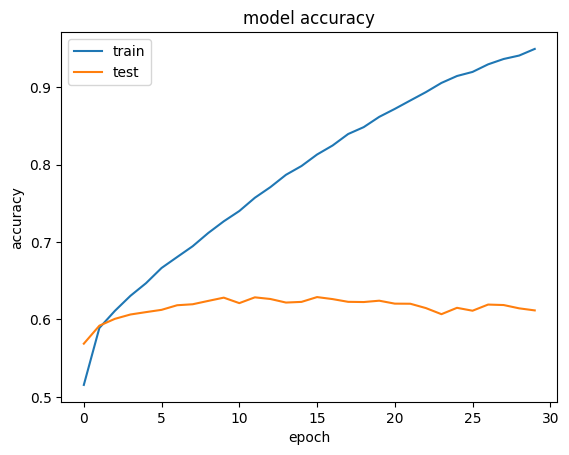

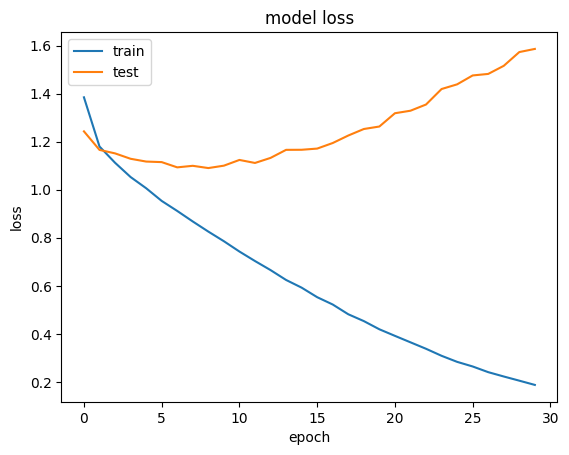

In [24]:
plot_model_history(history_pretrain)

In [25]:
test_loss, test_acc = pretrain_model.evaluate(test_img_f, test_label_one_hot)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6016 - loss: 1.6414
Test accuracy: 0.6014999747276306


In [26]:
predictions = pretrain_model.predict(test_img_f)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


array([1.6407075e-04, 2.6344501e-03, 7.1876872e-05, 8.9509487e-01,
       2.8064004e-03, 9.8751418e-02, 1.8734644e-04, 2.9525623e-05,
       1.2889063e-05, 2.4706183e-04], dtype=float32)

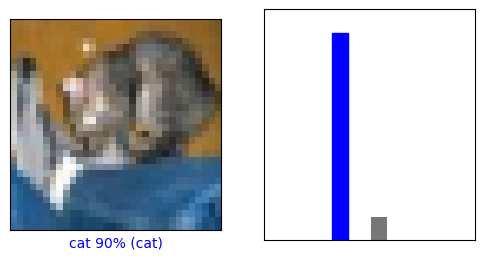

In [30]:
labelname = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
i = 0
pyplot.figure(figsize=(6,3))
pyplot.subplot(1,2,1)
show_image_prediction(i, predictions, test_label, test_img)
pyplot.subplot(1,2,2)
show_value_prediction(i, predictions, test_label)
predictions[i]

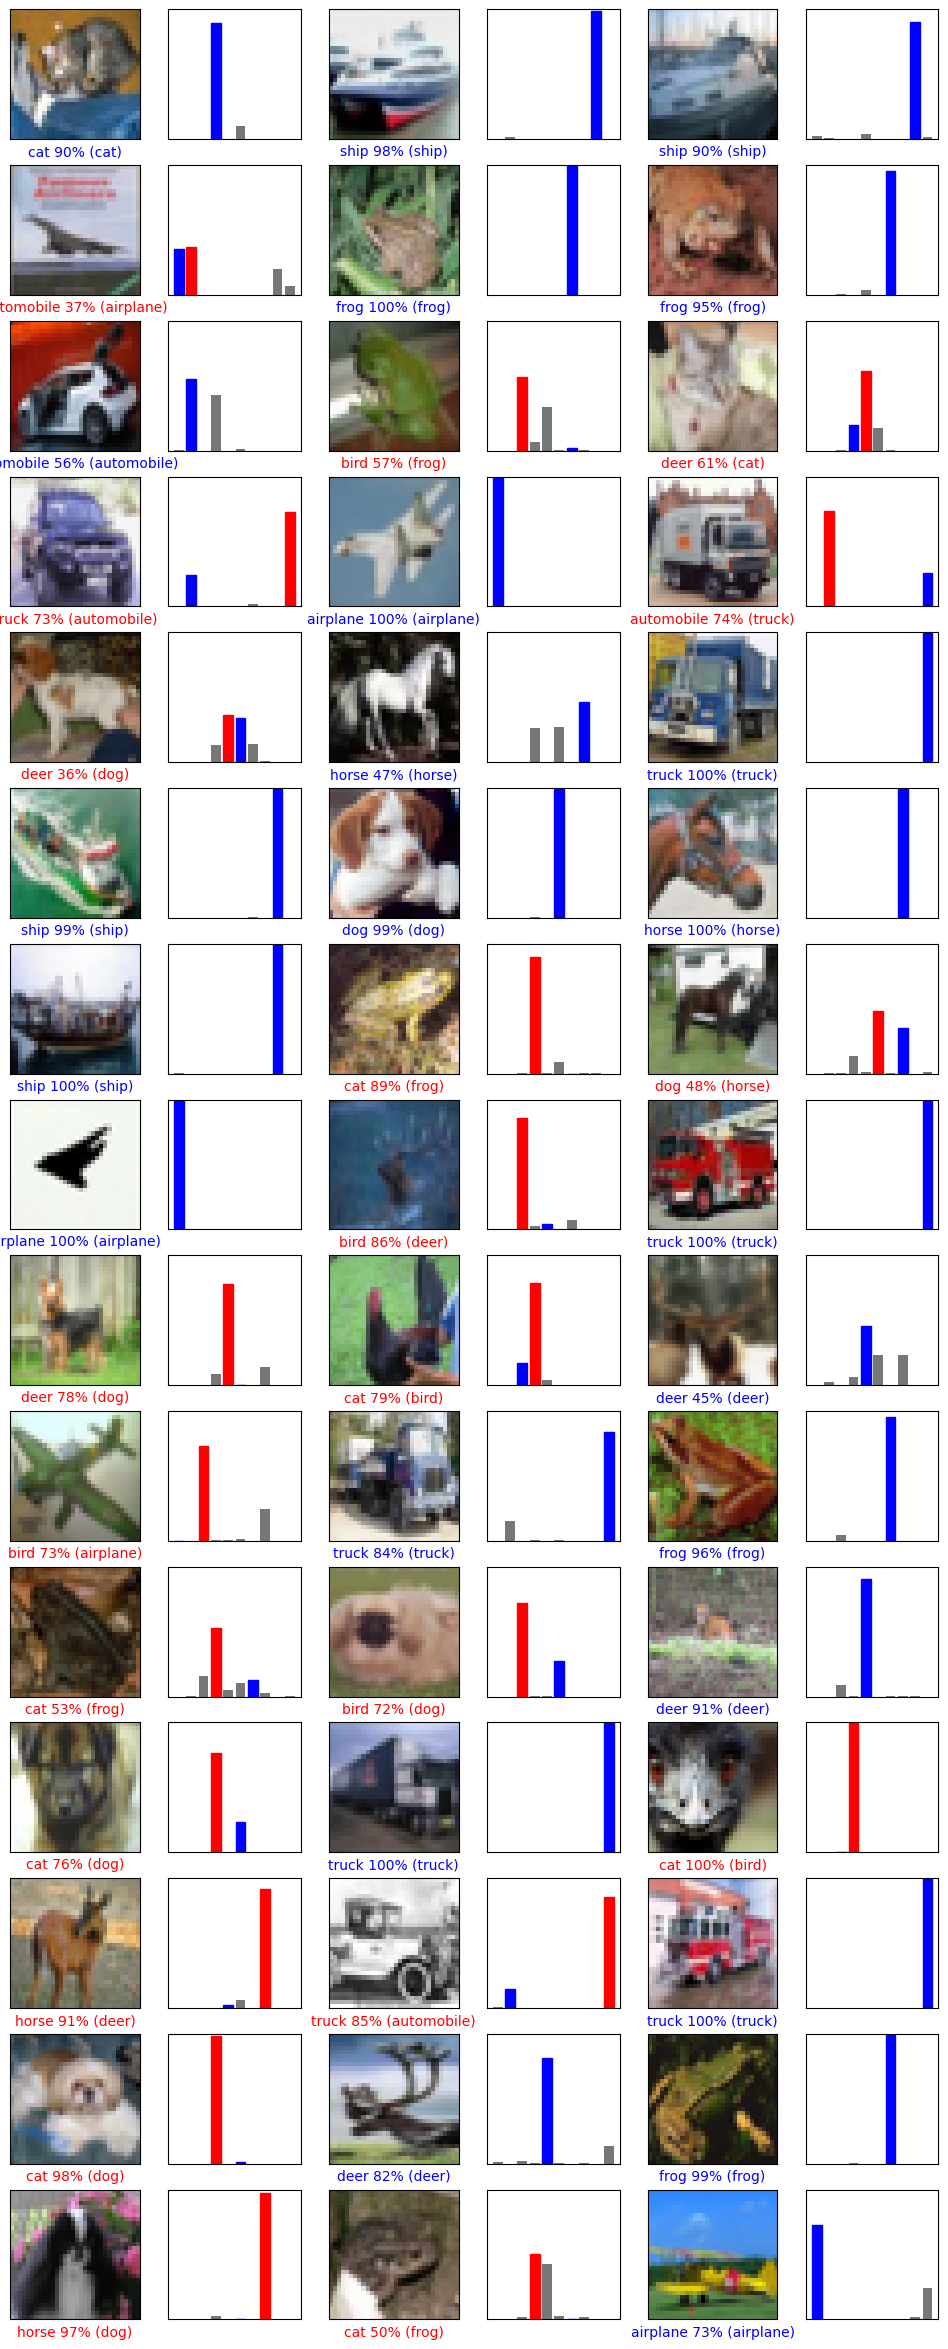

In [31]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
pyplot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  pyplot.subplot(num_rows, 2*num_cols, 2*i+1)
  show_image_prediction(i, predictions, test_label, test_img)
  pyplot.subplot(num_rows, 2*num_cols, 2*i+2)
  show_value_prediction(i, predictions, test_label)

## Fine Tune Model

In [32]:
# Fine-tuning the model
for layer in pretrain_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
pretrain_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
epochs = 5

start = time.time()
history_finetune = pretrain_model.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9764 - loss: 0.1256 - val_accuracy: 0.6256 - val_loss: 1.5619
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9837 - loss: 0.1025 - val_accuracy: 0.6258 - val_loss: 1.5625
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9847 - loss: 0.0985 - val_accuracy: 0.6251 - val_loss: 1.5712
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9869 - loss: 0.0926 - val_accuracy: 0.6264 - val_loss: 1.5763
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9869 - loss: 0.0920 - val_accuracy: 0.6261 - val_loss: 1.5829


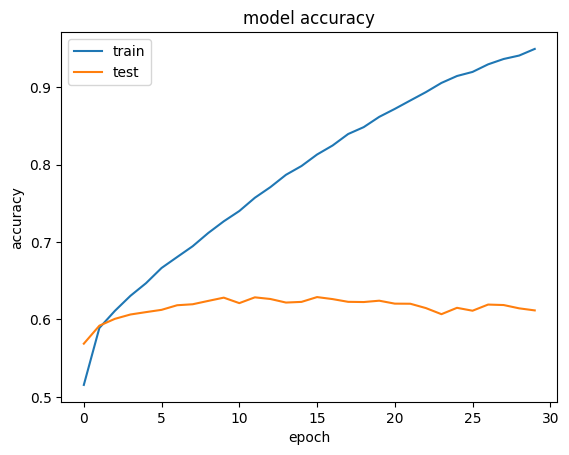

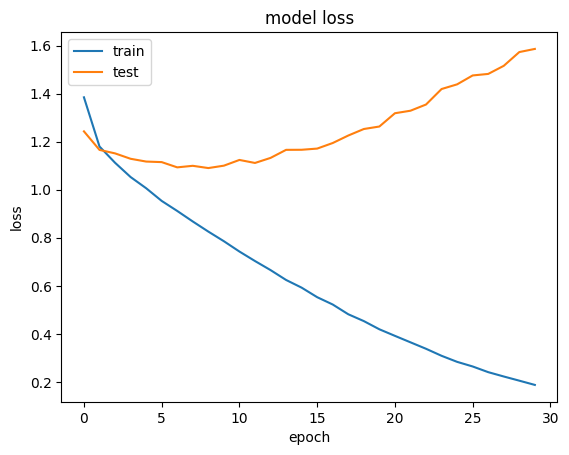

In [34]:
plot_model_history(history_pretrain)

## Change Model

In [36]:
# Build the model using VGG16 as base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(.3)(x)
x = Dense(128, activation='relu')(x)
model_schema = Dense(10, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=model_schema)

In [37]:
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │              

 Total params: 15,930,314 (60.77 MB)

 Trainable params: 15,930,314 (60.77 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Fine-tuning the model
for layer in model_2.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
epochs = 5

start = time.time()
history_finetune = model_2.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.4893 - loss: 1.4370 - val_accuracy: 0.7703 - val_loss: 0.6859
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.7812 - loss: 0.6658 - val_accuracy: 0.7811 - val_loss: 0.6441
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.8373 - loss: 0.4797 - val_accuracy: 0.8239 - val_loss: 0.5247
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8894 - loss: 0.3314 - val_accuracy: 0.8341 - val_loss: 0.5039
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9153 - loss: 0.2514 - val_accuracy: 0.8352 - val_loss: 0.5565


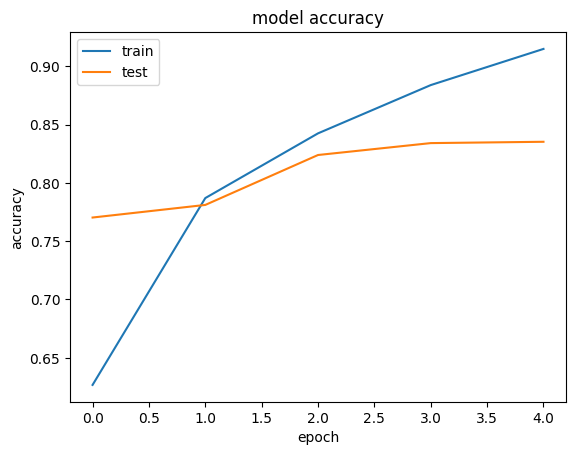

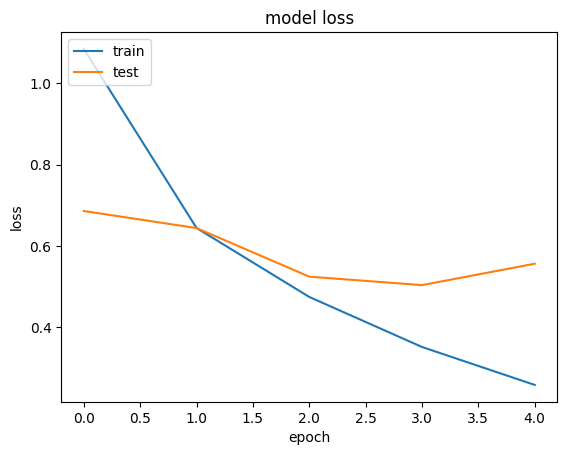

In [40]:
plot_model_history(history_finetune)

In [42]:
test_loss, test_acc = model_2.evaluate(test_img_f, test_label_one_hot)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8331 - loss: 0.5937
Test accuracy: 0.8309999704360962
